In [137]:
import numpy as np
import pandas as pd
import nltk
import spacy
import requests
from bs4 import BeautifulSoup
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

In [138]:
# Download necessary NLTK data
nltk.download('punkt')

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
# Drop unnecessary columns and rename the necessary ones
df = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [158]:

def most_frequent_words(df, all_words, amount):

  # Remove punctuation and split into words
  words = re.findall(r'\b\w+\b', all_words)

  # Get the 5 most common words
  most_common_words = Counter(words).most_common(5)
  print("5 most frequent words:")
  for word, freq in most_common_words:
      print(f"{word}: {freq}")

def count_of_words_apear_once(df, all_words):

  # Combine all text into a single string
  words = re.findall(r'\b\w+\b', all_words)
  # Count word frequencies
  word_freq = Counter(words)

  # Count words that appear only once
  unique_words = sum(1 for word, freq in word_freq.items() if freq == 1)
  print(f"Number of words that only appear once: {unique_words}")

def avg_words_per_message(df, column):
  df['word_count'] = df[column].apply(lambda x: len(x.split()))
  average_words = df['word_count'].mean()
  print(f"Average number of words per message: {average_words:.2f}")

def total_num_of_data(df):
  total_messages = len(df)
  print(f"Total number of messages: {total_messages}")

  # Function to print word statistics
def print_word_statistics(text):
    str = " ".join(text)
    words = word_tokenize(str)
    total_words = len(words)
    unique_words = len(set(words))
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(10)

    print(f"Total words: {total_words}")
    print(f"Unique words: {unique_words}")

# **Basic Analysis - Before Proccessing**

In [141]:
num_spam = len(df[df['label'] == 'spam'])
num_ham = len(df[df['label'] == 'ham'])
print(f"Number of spam messages: {num_spam}")
print(f"Number of ham messages: {num_ham}")

Number of spam messages: 747
Number of ham messages: 4825


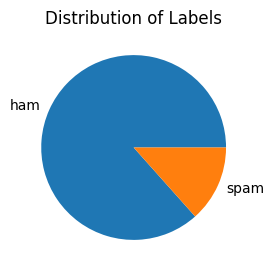

In [142]:
df.label.value_counts().plot(kind='pie', figsize=(3, 3))
plt.title('Distribution of Labels')
plt.ylabel('')  # This removes the y-label which is not meaningful in a pie chart
plt.show()

In [143]:
# Combine all text into a single string
all_words = ' '.join(df['text']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['text'])

# Average number of words per message
avg_words_per_message(df, 'text')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)


---------Before Text Processing-------
Total number of messages: 5572
Total words: 104164
Unique words: 11528
Average number of words per message: 15.49
5 most frequent words:
i: 3001
to: 2242
you: 2240
a: 1433
the: 1328
Number of words that only appear once: 4376


# **Text Processing**

# Cleaning The Data

In [144]:
def data_cleaning(df, column):
  # Handle missing values
  df = df.dropna()  # Drop rows with any missing values

  # Convert text to lowercase
  df[column] = df[column].str.lower()

  # Remove punctuation
  df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

  # Remove special characters
  df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Zא-ת0-9\s]', '', x))

  # Step 6: Remove stop words
  df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

  # Use the sub() method to replace URLs with the specified replacement text
  df[column] =df[column].apply(lambda x : re.sub(r'https\S*', '', x))

  # Replace empty strings with NaN
  df[column] = df[column].replace('', pd.NA)

  # Drop rows with NaN values in the specified column
  df = df.dropna(subset=[column])
  # Display the first few rows of the cleaned DataFrame
  print("Cleaned data preview:")
  print(df)
  return df

In [145]:
df = data_cleaning(df , 'text')

Cleaned data preview:
     label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                         text  \
0                                                          go jurong point crazy available bugis n great world la e buffet cine got amore wat   
1                                                                                                                     ok lar joking wif u oni   
2     free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s   
3                                                                                                         u dun say early hor u c already say   
4                                                                                   

# **Basic Analysis - After Proccessing**

In [146]:
# Combine all text into a single string
all_words = ' '.join(df['text']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['text'])

# Average number of words per message
avg_words_per_message(df, 'text')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------After Text Processing-------
Total number of messages: 5567
Total words: 52243
Unique words: 9345
Average number of words per message: 9.36
5 most frequent words:
u: 1119
call: 576
2: 478
im: 471
get: 386
Number of words that only appear once: 5138


# Nltk Tokenizer

In [147]:
from nltk.tokenize import word_tokenize

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['text'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.58487868309021 seconds
0                                                                [go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]
1                                                                                                                                     [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]
3                                                                                                                      [u, dun, say, early, hor, u, c, already, say]
4                                                                                                               [nah, dont, think, goes, usf, lives, around, though]
5                                                        [freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, t

# SpaCy Tokenizer


In [148]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
tokenizer = Tokenizer(nlp.vocab)
start_time = time.time()
tokens = tokenizer(all_words)
print(list(tokens)[:30])

spacy_time = time.time() - start_time
print(f"spaCy tokenization time: {spacy_time} seconds")

[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat, ok, lar, joking, wif, u, oni, free, entry, 2, wkly, comp, win, fa, cup]
spaCy tokenization time: 0.285876989364624 seconds


# **NLTK and SpaCy Tokenization comparison**

 NLTK returns a list of strings, which represents a tokenized word, while spaCy returns a list of spaCy token objects.  spaCy's tokenization takes approximately half of the time of NLTK.      
 Language Support:

NLTK:  offers support for tokenization in various languages, although it may require additional configurations or resources for some languages.

spaCy: designed to support multiple languages out of the box, and its tokenization capabilities are optimized for efficiency.

# Lemmatization with Nltk

In [149]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
x = all_words.split()
start_time = time.time()

for w in x:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0.22417235374450684

In [150]:
print('15 examples of tokens where the token text differs from its lemma')
count = 0
for w in x:
    if w != lemmatizer.lemmatize(w, pos='n'):
        print(w +':' + lemmatizer.lemmatize(w, pos='n'))
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
goes:go
lives:life
weeks:week
aids:aid
callers:caller
friends:friend
hours:hour
months:month
mobiles:mobile
chances:chance
pounds:pound
words:word
times:time
months:month
sucks:suck


# Lemmatization with SpaCy

In [151]:
import spacy
import time
# Load spaCy model
nlp = spacy.load('en_core_web_sm')


def lemmatize_with_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

start_time = time.time()
df['lemmatized_spacy'] = df['text'].apply(lemmatize_with_spacy)
spacy_time = time.time() - start_time

print(f"Lemmatization time using spaCy: {spacy_time:.6f} seconds")


Lemmatization time using spaCy: 40.742224 seconds


In [152]:
# Initialize counter
count = 0
print('15 examples of tokens where the token text differs from its lemma')

# Print 15 examples of tokens where the token text differs from its lemma
for token in nlp(all_words):
    if token.text != token.lemma_:
        print(f"{token.text:>20} : {token.lemma_}")
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
                 got : get
              joking : joke
                  nt : not
                goes : go
               lives : live
               weeks : week
             callers : caller
             friends : friend
              valued : value
            selected : select
               hours : hour
              months : month
            entitled : entitle
              latest : late
             mobiles : mobile


# **NLTK and SpaCy Lemmatization comparison**

The lemmatization process using spaCy took approximately 51.12 seconds, which is significantly slower compared to NLTK. This indicates that while spaCy offers robust NLP capabilities, it may require more processing time for lemmatization.

**Output Format:** Both NLTK and spaCy produce lists of lemmatized words.
However, the actual lemmas produced can differ slightly due to the
underlying algorithms and linguistic models.

**Processing Speed:** NLTK is significantly faster in lemmatization compared to spaCy for the given dataset.

# Stemming with Nltk

In [153]:
import time
from nltk.stem import PorterStemmer
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(w) for w in words]
    return ' '.join(stemmed_words)

start_time = time.time()
df['stemmed_nltk'] = df['text'].apply(stem_with_nltk)
nltk_time = time.time() - start_time

print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemming time using NLTK: 1.671538 seconds


# Stemming with spaCy - SpaCy itself does not include a stemming function

# **Web Scraping**


In [154]:

url = "https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACHRzA667AARXS__2v5de8mNTKOyFF7jW-cvNi0GO_xT-fg69PydO0Xa5iRXetlJA6ZBGR8ToumsedNBLhkHE7kaWLicN4ilmYfg8EShk1l-Suxct2famqmVFYAZhpPEHLJQLWiwAb9eATIGeIh_NniR12bb44fwIwKtuw-o1c1i"  # Replace with the actual URL
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extracting post texts from a hypothetical social media profile
    posts = soup.find_all('p')  # This will vary based on the actual HTML structure
    for post in posts:
        post.get_text()
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [155]:
len(posts)
df = pd.DataFrame(posts, columns=['posts'])
print(df)

# **Basic Analysis - Before Proccessing**

In [159]:
# Combine all text into a single string
all_words = ' '.join(df['posts']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['posts'])

# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------Before Text Processing-------
Total number of messages: 19
Total words: 1019
Unique words: 535
Average number of words per message: 45.95
5 most frequent words:
the: 51
a: 26
in: 23
of: 20
to: 20
Number of words that only appear once: 373


# Data cleaning

In [160]:
column = 'posts'
data_cleaning(df, column)

Cleaned data preview:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

,posts,word_count
0,experiencing temporary issues market data page currently delayed please bear us address restore personalized lists,28
1,another sign inflation subsiding surging first quarter 2024,15
2,shares broadcom avgo soaring early trading addition reporting betterthanexpected q2 results chip company announced 10for1 stock split occur market close july 12 meanwhile tesla tsla ceo elon musk posted x shareholder resolutions would reinstate 46 billion pay package move companys incorporation texas passing wide margins final results tallies expected later today trending tickers yahoo finance include nvidia nvda arm holdings arm adobe adbe top guests today include900 et krishna guha evercore isi vice chairman910 et garrett nelson cfra research analyst935 et brent schutte northwestern mutual wealth management chief investment officer1000 et mohamed elerian allianz chief economic advisor1130 et jere doyle bny mellon wealth management tax estate planning strategist,147
3,feds decision interest rates affects savings products various types loans credit cards,17
4,heres look prices changed past 12 months,15
5,mays cpi showed inflation cooling raising investor hopes fed rate cuts,13
6,theres optimism gas prices continue cool months ahead,13
7,goods inflation back normal services still problem,11
8,among stocksplit stocks nvidia walmart chipotle mexican grill lam research sony group amphenol cintas theres one phenomenal bargain thats hiding plain sight,24
9,shares semiconductor networking specialist get much cheaper,13


# **Basic Analysis - After Proccessing**

In [161]:
# Combine all text into a single string
all_words = ' '.join(df['posts']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['posts'])

# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------After Text Processing-------
Total number of messages: 19
Total words: 1019
Unique words: 535
Average number of words per message: 45.95
5 most frequent words:
the: 51
a: 26
in: 23
of: 20
to: 20
Number of words that only appear once: 373


# **NLTK Tokenization**

In [162]:

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['posts'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.019848108291625977 seconds
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [We, are, experiencing, some, temporary, issues, ., The, market, data, on, this, page, is, currently, delayed, ., Please, bear, with, us, as, we, address, this, and, restore, your, personalized, lists, .]
1                                                                                                                                                                                                                                                                                       

# **NLTK Lemmatization**

In [163]:

# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)

start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

['We', 'are', 'experiencing', 'some', 'temporary', 'issues', '.', 'The', 'market', 'data', 'on', 'this', 'page', 'is', 'currently', 'delayed', '.', 'Please', 'bear', 'with', 'us', 'as', 'we', 'address', 'this', 'and', 'restore', 'your', 'personalized', 'lists', '.', 'It', "'s", 'another', 'sign', 'that', 'inflation', 'is', 'subsiding', 'after', 'surging', 'in', 'the', 'first', 'quarter', 'of', '2024', '.', 'Shares', 'of', 'Broadcom', '(', 'AVGO', ')', 'are', 'soaring', 'in', 'early', 'trading', '.', 'In', 'addition', 'to', 'reporting', 'better-than-expected', 'Q2', 'results', ',', 'the', 'chip', 'company', 'announced', 'a', '10-for-1', 'stock', 'split', 'that', 'will', 'occur', 'after', 'the', 'market', 'close', 'on', 'July', '12', '.', 'Meanwhile', ',', 'Tesla', '(', 'TSLA', ')', 'CEO', 'Elon', 'Musk', 'posted', 'on', 'X', 'that', 'shareholder', 'resolutions', 'that', 'would', 'reinstate', 'his', '$', '46', 'billion', 'pay', 'package', 'and', 'move', 'the', 'company', '’', 's', 'incor

0.007044792175292969

# **NLTK Stemming**

In [164]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemmed dataframe using NLTK:
we are experienc some temporari issu . the market data on thi page is current delay . pleas bear with us as we address thi and restor your person list . it 's anoth sign that inflat is subsid after surg in the first quarter of 2024 . share of broadcom ( avgo ) are soar in earli trade . in addit to report better-than-expect q2 result , the chip compani announc a 10-for-1 stock split that will occur after the market close on juli 12 . meanwhil , tesla ( tsla ) ceo elon musk post on x that sharehold resolut that would reinstat hi $ 46 billion pay packag and move the compani ’ s incorpor to texa are both “ pass by wide margins. ” final result of the talli are expect later today . other trend ticker on yahoo financ includ nvidia ( nvda ) , arm hold ( arm ) , and adob ( adb ) . top guest today include:9:00 a.m . et - krishna guha , evercor isi vice chairman9:10 a.m . et - garrett nelson , cfra research analyst9:35 a.m . et - brent schutt , northwestern mutual we

# **WhatsApp Analysis**

In [165]:
with open('whatsapp.txt', 'r', encoding='utf-8') as file:
    whatsapp_data = file.read()

In [166]:

import pandas as pd
import re

# Split raw data by newline
lines = whatsapp_data.strip().split('\n')

# Function to extract name and message, and remove name from message
def process_line(line):
    pattern = r'~\s*(.*?):\s*(.*)'
    match = re.search(pattern, line)
    if match:
        name = match.group(1).strip()
        message = match.group(2).strip()
        return name, message
    else:
        return None, line.strip()

# Process each line
data = []
for line in lines:
    name, message = process_line(line)
    if name:
        data.append({'name': name, 'message': message})



In [167]:
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
df.to_csv("/content/whatsapp_data.csv")

              name                                                message
0        Bar moshe                     ‫‏הקבוצה נוצרה על ידי ~ Bar moshe‬
1       Lil Jo’H 🎧  מישהו מכיר מורה פרטי למערכות הפעלה וגם ללמידת מכונה ?
2       Lil Jo’H 🎧                  מישהו יודע איך להוריד Linux בMac M1 ?
3            GabiL                                                לא צריך
4            GabiL                    הטרמינל של מאק הוא שווה ערך ללינוקס
..             ...                                                    ...
742       Or Cohen           מישהו עשה את הקורס למידה חישובית ( לא סמינר)
743  ליטל חוטיאקוב                          יש קבוצת ווצאפ של שפות תכנות?
744      Bar Yaron                      יש בתיאור קישור מרוכז לכל הקבוצות
745  ליטל חוטיאקוב                                                  תודה!
746      Tom Cohen                                         ‏התמונה הושמטה

[747 rows x 2 columns]


# Basic Analysis - Before Processing

In [168]:
# Combine all text into a single string
all_words = ' '.join(df['message']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['message'])

# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------Before Text Processing-------
Total number of messages: 747
Total words: 5015
Unique words: 1948
Average number of words per message: 6.00
5 most frequent words:
לא: 83
התמונה: 81
הושמטה: 80
זה: 74
יש: 72
Number of words that only appear once: 1298


# Cleaning Data

In [169]:
df = data_cleaning(df, 'message')
df


Cleaned data preview:
              name                                              message  \
0        Bar moshe                        הקבוצה נוצרה על ידי bar moshe   
1       Lil Jo’H 🎧  מישהו מכיר מורה פרטי למערכות הפעלה וגם ללמידת מכונה   
2       Lil Jo’H 🎧                  מישהו יודע איך להוריד linux בmac m1   
3            GabiL                                              לא צריך   
4            GabiL                  הטרמינל של מאק הוא שווה ערך ללינוקס   
..             ...                                                  ...   
742       Or Cohen            מישהו עשה את הקורס למידה חישובית לא סמינר   
743  ליטל חוטיאקוב                         יש קבוצת ווצאפ של שפות תכנות   
744      Bar Yaron                    יש בתיאור קישור מרוכז לכל הקבוצות   
745  ליטל חוטיאקוב                                                 תודה   
746      Tom Cohen                                        התמונה הושמטה   

     word_count  
0             7  
1            10  
2             8  
3    

,name,message,word_count
0,Bar moshe,הקבוצה נוצרה על ידי bar moshe,7
1,Lil Jo’H 🎧,מישהו מכיר מורה פרטי למערכות הפעלה וגם ללמידת מכונה,10
2,Lil Jo’H 🎧,מישהו יודע איך להוריד linux בmac m1,8
3,GabiL,לא צריך,2
4,GabiL,הטרמינל של מאק הוא שווה ערך ללינוקס,7
...,...,...,...
742,Or Cohen,מישהו עשה את הקורס למידה חישובית לא סמינר,9
743,ליטל חוטיאקוב,יש קבוצת ווצאפ של שפות תכנות,6
744,Bar Yaron,יש בתיאור קישור מרוכז לכל הקבוצות,6
745,ליטל חוטיאקוב,תודה,1


In [170]:
len(df)

713

In [171]:
pd.set_option('display.max_colwidth', None)
df
df.to_csv("/content/whatsapp_data_clean.csv", index=False)

# Basic Analysis - After Processing

In [172]:
# Combine all text into a single string
all_words = ' '.join(df['message']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['message'])

# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------After Text Processing-------
Total number of messages: 713
Total words: 4338
Unique words: 1808
Average number of words per message: 6.08
5 most frequent words:
לא: 83
התמונה: 81
הושמטה: 80
זה: 74
יש: 72
Number of words that only appear once: 1233


# **whatapp tokenazition**

In [173]:
start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['message'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.5628550052642822 seconds
0                              [הקבוצה, נוצרה, על, ידי, bar, moshe]
1     [מישהו, מכיר, מורה, פרטי, למערכות, הפעלה, וגם, ללמידת, מכונה]
2                       [מישהו, יודע, איך, להוריד, linux, בmac, m1]
3                                                        [לא, צריך]
4                       [הטרמינל, של, מאק, הוא, שווה, ערך, ללינוקס]
7                                                        [ערב, טוב]
8                                      [עד, מתי, יש, היום, לימודים]
9                                                              [17]
10                                                           [תודה]
11                               [מחר, לומדים, כרגיל, או, חצי, יום]
Name: nltk_tokens, dtype: object


In [174]:
import time
# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)

start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='v'))
time = time.time() - start_time
time

['הקבוצה', 'נוצרה', 'על', 'ידי', 'bar', 'moshe', 'מישהו', 'מכיר', 'מורה', 'פרטי', 'למערכות', 'הפעלה', 'וגם', 'ללמידת', 'מכונה', 'מישהו', 'יודע', 'איך', 'להוריד', 'linux', 'בmac', 'm1', 'לא', 'צריך', 'הטרמינל', 'של', 'מאק', 'הוא', 'שווה', 'ערך', 'ללינוקס', 'ערב', 'טוב', 'עד', 'מתי', 'יש', 'היום', 'לימודים', '17', 'תודה', 'מחר', 'לומדים', 'כרגיל', 'או', 'חצי', 'יום', 'אין', 'לימודים', 'מחר', 'סגור', 'תודה', 'התמונה', 'הושמטה', 'מישהו', 'מכיר', 'את', 'השגיאה', 'שמופיע', 'פתאום', 'בהרצה', 'של', 'הפרויקט', 'במקבילי', 'לא', 'חושב', 'שזה', 'טעות', 'או', 'שלא', 'ראיתי', 'טוב', 'ואני', 'מתבלבל', 'זה', 'שגיאה', 'זה', 'לא', 'מריץ', 'את', 'הפרויקט', 'פתאום', 'זה', 'קרה', 'לעוד', 'אנשים', '972525757622', 'הודעה', 'זו', 'נמחקה', 'הכל', 'טוב', 'הסתדר', 'זה', 'עובד', 'גם', 'בלי', 'לעשות', 'כלום', 'סליחה', 'פשוט', 'לא', 'מובן', 'לנה', 'מופיע', 'למישהו', 'קרה', 'שלא', 'עבד', 'לו', 'ההרצה', 'על', 'שני', 'מחשבים', 'ועל', 'כל', 'אחד', 'בנפרד', 'כן', 'עובד', 'כן', 'קרה', 'לי', 'אותו', 'דבר', 'בוריס', 'אמר',

0.030585289001464844

In [175]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemmed dataframe using NLTK:
הקבוצה נוצרה על ידי bar mosh מישהו מכיר מורה פרטי למערכות הפעלה וגם ללמידת מכונה מישהו יודע איך להוריד linux בmac m1 לא צריך הטרמינל של מאק הוא שווה ערך ללינוקס ערב טוב עד מתי יש היום לימודים 17 תודה מחר לומדים כרגיל או חצי יום אין לימודים מחר סגור תודה התמונה הושמטה מישהו מכיר את השגיאה שמופיע פתאום בהרצה של הפרויקט במקבילי לא חושב שזה טעות או שלא ראיתי טוב ואני מתבלבל זה שגיאה זה לא מריץ את הפרויקט פתאום זה קרה לעוד אנשים 972525757622 הודעה זו נמחקה הכל טוב הסתדר זה עובד גם בלי לעשות כלום סליחה פשוט לא מובן לנה מופיע למישהו קרה שלא עבד לו ההרצה על שני מחשבים ועל כל אחד בנפרד כן עובד כן קרה לי אותו דבר בוריס אמר להתעלם תודה זה שגיאה של ה vlab בוריס אמר לא להתייחס התמונה הושמטה החל משבוע הבא בימי שני דינה תעשה לנו את ההגנות לפרוייקטי גמר למה היא לא מודיע מראש בדרך כלל היא אומרת לנו בראשון בלילה אז זה כבר התקדמות למרות שזה הכי טוב שאפשר לקבל מדינה בשעות 811 או 1417 קיבלנו אישור כזה או שמחכים שהמכללה תאשר שאלתי את דינה מבחינתה אין שינוי וזה קורה רגיל ב16 נעש